My Perceptron Algorithm Accuracy in % 
[90, 81, 72, 88, 86]
Inbuilt Algorithm Accuracy in % 
[83, 74, 79, 78, 83]


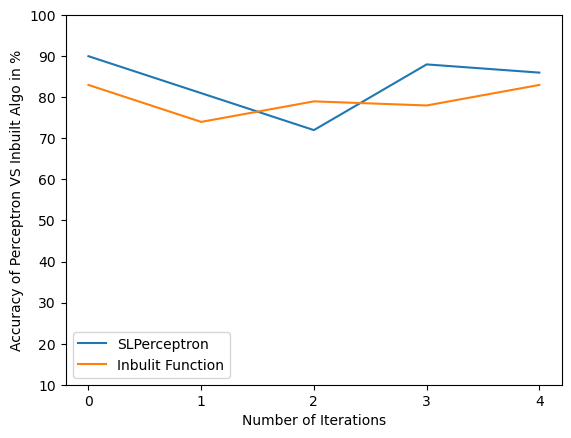

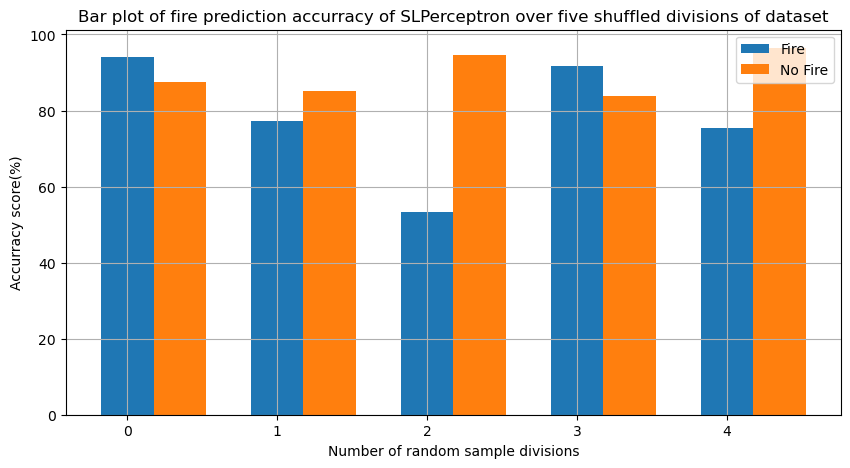

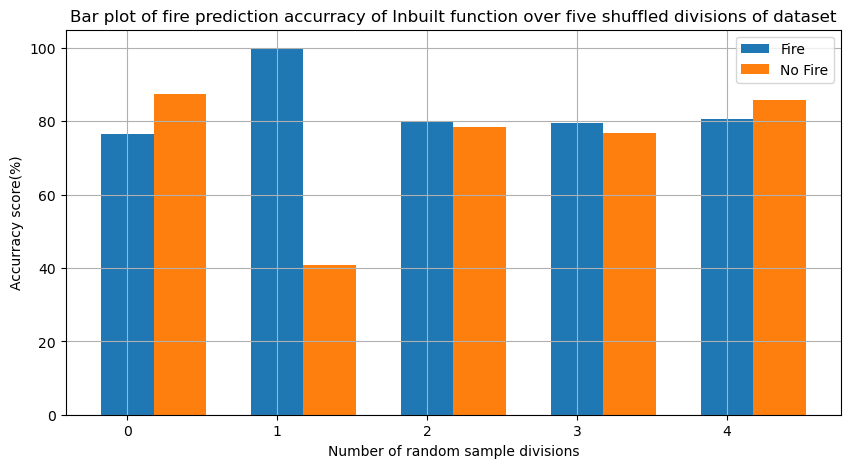

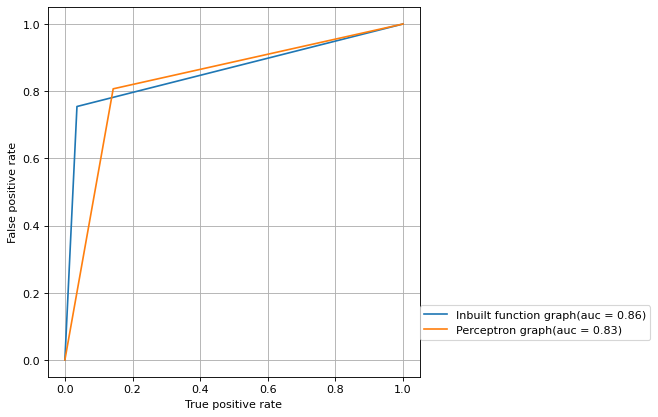

0.8584070796460177


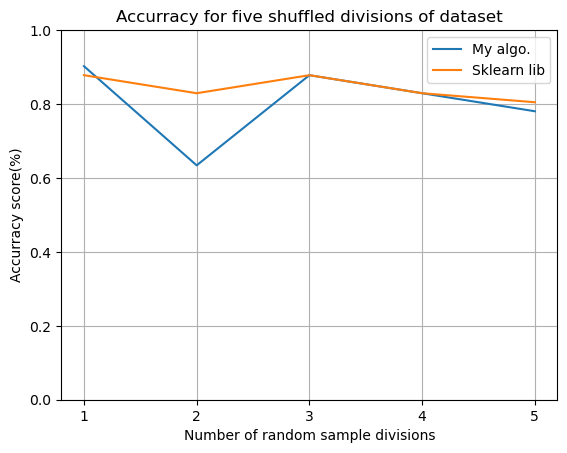

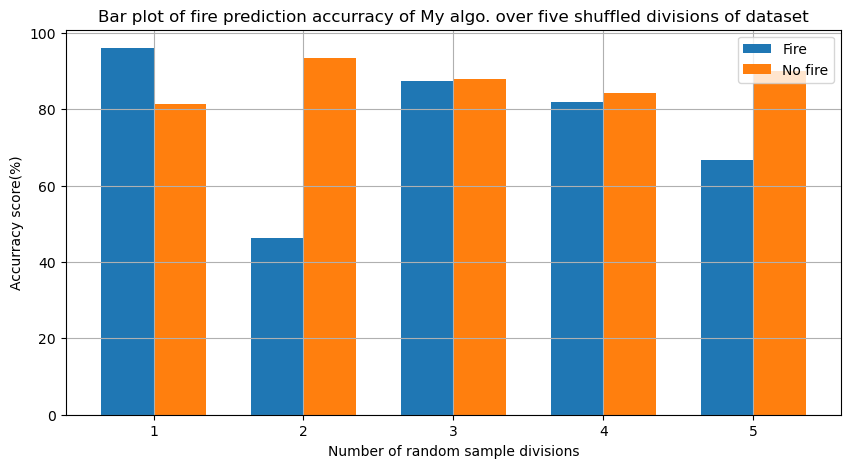

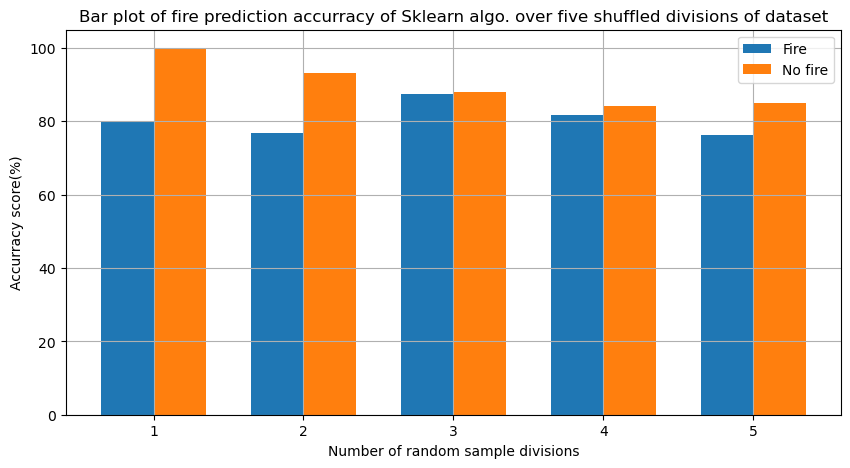

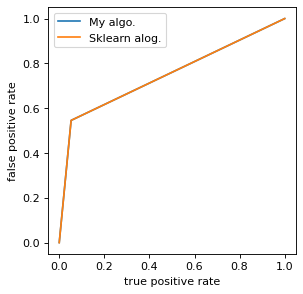

In [1]:
#__Perceptron Algorithm.


#Step 1:
import pandas as pd
import numpy as np



#Step 2:
data=pd.read_csv('filename.csv')
#REmove the Index column
data = data.iloc[:,1:]


#Step 3:
#MinMax scaling to all columns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

# scale age using min max
scale = MinMaxScaler()

 # reshape because of minmax take column and scale
    
#MinMax to year column
scale.fit(data['year'].values.reshape(-1,1))
data['year'] = scale.transform(data['year'].values.reshape(-1,1))

#MinMax to temp column
scale.fit(data['temp'].values.reshape(-1,1))
data['temp'] = scale.transform(data['temp'].values.reshape(-1,1))

#MinMax to humidity column
scale.fit(data['humidity'].values.reshape(-1,1))
data['humidity'] = scale.transform(data['humidity'].values.reshape(-1,1))

#MinMax to rainfall column
scale.fit(data['rainfall'].values.reshape(-1,1))
data['rainfall'] = scale.transform(data['rainfall'].values.reshape(-1,1))

#MinMax to drought_code column
scale.fit(data['drought_code'].values.reshape(-1,1))
data['drought_code'] = scale.transform(data['drought_code'].values.reshape(-1,1))

#MinMax to buildup_index column
scale.fit(data['buildup_index'].values.reshape(-1,1))
data['buildup_index'] = scale.transform(data['buildup_index'].values.reshape(-1,1))

#MinMax to day column
scale.fit(data['day'].values.reshape(-1,1))
data['day'] = scale.transform(data['day'].values.reshape(-1,1))

#MinMax to month column
scale.fit(data['month'].values.reshape(-1,1))
data['month'] = scale.transform(data['month'].values.reshape(-1,1))

#MinMax to wind_speed column
scale.fit(data['wind_speed'].values.reshape(-1,1))
data['wind_speed'] = scale.transform(data['wind_speed'].values.reshape(-1,1))


#Step 4:
#Replace yes as 1 and No as 0 in fire column
data['fire']=data['fire'].replace("yes",1)
data['fire']=data['fire'].replace("no",0)

label = data['fire'] # output is seperated to a variable called label
data1 = data.drop(['fire'], axis=1) #Input is seperated to variable data


#Step 5:
class SLPerceptron:
    
    #Fit method take input only X= Independent features and y=dependent features.    
    def fit(self,X,y,LR=0.01,N_iter=1200):
        
        #Initially created an array of 9 zeros which represent inital value is zero of all weights.
        self.wt=np.zeros(X.shape[1])
        #Initially Bias is 0
        self.bias=0
        #Assign Learning rate to lr
        self.lr=LR
        #Assign number of iterations to epochs.
        self.epochs=N_iter
        
        
        #Initialize for loop try to loop till convergence, by prediction of 1200 iterations
        for epoch in range(self.epochs):
            
            #for loop to get maximum accuracy of learning rate and bias.
            for i in range(X.shape[0]):
                y_pred = np.dot(self.wt,X[i])+self.bias
                
                #If else statement work as a activation function
                if y_pred> 0:
                    y_pred = 1
                else:
                    y_pred = 0
                    
                #update weights and bias according to predicted dependent variable and actual dependent varible.  
                self.wt=self.wt + self.lr * (y[i]-y_pred)*X[i]
                self.bias = self.bias + self.lr * (y[i]-y_pred)
                
    
    def predict(self,X) :
        #created an empty array to store predicted values
        y_pred1=[]
        
        #For loop initialized till get all predicted values
        for row in range(X.shape[0]) :
            
            #Value of weight and bias taken, that already set according to train data in fit method.
            y = np.dot(self.wt,X[row]) + self.bias
            
            #If else statement work as a activation function
            if y> 0 :
                y = 1
            else:
                y = 0
            #Append value of y each time into y_pred1 array    
            y_pred1.append(y)
        
        #print all the predicted values
        return y_pred1



#Step 6: for accuracy of SLPerceptron algorithm vs Inbuilt accuracy.

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

#Empty array to store accuracy of SLPerceptron algorithm and Inbuilt accuracy each time.
my_scores=[]
lnbuilt_scores=[]

#Empty array to calculate number of iterations
iterations=[]

#Array named as yes and no to store the predict dependent variables in each iteration from MLPerceptrom Algorithm.
yes=[]
no=[]


#Array named as yes1 and no1 to store the predict dependent variables each iteration from Inbuilt function. 
yes1=[]
no1=[]

#Function created to get accuracy of yes and no for algorithms.
def pred_acc(Y, pred):
    true_count = 0
    pred_true = 0
    false_count = 0
    pred_false = 0
    for i in range(len(Y)):
        if(Y[i] == 1):
            true_count += 1
        else:
            false_count += 1
        if(Y[i] == pred[i] and pred[i] == 1):
            pred_true += 1
        elif(Y[i] == pred[i] and pred[i] == 0):
            pred_false += 1
    return round((pred_true/true_count)*100,2) , round((pred_false/false_count)*100,2)


#test_s array for 5 different size of test and train split data
test_s=[0.2,0.3,0.4,0.45,0.55]
for i in range(len(test_s)):
    
    data1_train, data1_test, label_train, label_test = train_test_split(data1, label, test_size=test_s[i],shuffle=True)
    
    #convert dataframe to array
    data1_train=data1_train.to_numpy()
    label_train=label_train.to_numpy()
    data1_test=data1_test.to_numpy()
    label_test=label_test.to_numpy()
    
    #Insert train data into SLPerceptron Algorithm
    a= SLPerceptron()
    a.fit(data1_train,label_train)
    
    # Store prediction result accuracy into an my_score array 
    y_prediction=a.predict(data1_test)
    accuracy = round(np.sum(y_prediction == label_test)/len(label_test)*100)
    my_scores.append(accuracy)
    
    
    # Insert train data into Inbuilt perceptron function
    clf = Perceptron()
    clf.fit(data1_train,label_train)
    
    # Store prediction result accuracy into an Inbuilt_scores array 
    y_pred=clf.predict(data1_test)
    lnbuilt_scores.append(round(accuracy_score(label_test,y_pred)*100))
    iterations.append(i)
    
    
    # Check accuracy of yes and no from SLPerceptron algorithm and store in an array.
    pred_yes, pred_no = pred_acc(label_test,y_prediction)
    yes.append(pred_yes)
    no.append(pred_no)
    
    # Check accuracy of yes and no from Inbuilt function and store in an array
    pred_yes1, pred_no1 = pred_acc(label_test,y_pred)
    yes1.append(pred_yes1)
    no1.append(pred_no1)



print("My Perceptron Algorithm Accuracy in % ")
print(my_scores)

print("Inbuilt Algorithm Accuracy in % ")
print(lnbuilt_scores)



#Graph to check the accuracy of SLPerceptron vs Inbuilt function in each iteration.
plt.plot(iterations, my_scores, label = "SLPerceptron")
plt.plot(iterations, lnbuilt_scores, label = "Inbulit Function")
plt.ylim(10,100)
plt.xticks([0,1 , 2, 3, 4])
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy of Perceptron VS Inbuilt Algo in %")
plt.legend()
plt.show() 



#Graph that represent the accuracy of dependent variables in SLPerceptron algorithm over five shuffled divisions of dataset.
ind = np.arange(5)
plt.figure(figsize=(10,5))
plt.bar(ind, yes,0.35, label="Fire")
plt.bar(ind+0.35, no,0.35, label="No Fire")
plt.grid(linestyle='-')
plt.xticks([0 , 1, 2, 3, 4])
plt.xlabel("Number of random sample divisions")
plt.ylabel("Accurracy score(%)")
plt.legend()
plt.title("Bar plot of fire prediction accurracy of SLPerceptron over five shuffled divisions of dataset")


# In[335]:


#Graph that represent the accuracy of dependent variables in Inbuilt function over five shuffled divisions of dataset.
ind = np.arange(5)
plt.figure(figsize=(10,5))
plt.bar(ind, yes1,0.35, label="Fire")
plt.bar(ind+0.35, no1,0.35, label="No Fire")
plt.grid(linestyle='-')
plt.xticks([0 , 1, 2, 3, 4])
plt.xlabel("Number of random sample divisions")
plt.ylabel("Accurracy score(%)")
plt.legend()
plt.title("Bar plot of fire prediction accurracy of Inbuilt function over five shuffled divisions of dataset")


# In[336]:


#ROC curve
from sklearn.metrics import roc_curve, auc

x,y,thres = roc_curve(label_test,y_prediction)
a = auc(x, y)

x1,y1,thres1 = roc_curve(label_test,y_pred)
a1 = auc(x1, y1)

plt.figure(figsize=(6, 6), dpi=80)
plt.plot(x,y,linestyle='-',label='Inbuilt function graph(auc = %0.2f)'%a)
plt.plot(x1,y1,linestyle='-',label='Perceptron graph(auc = %0.2f)'%a1)

plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.legend(loc=(1,0.1))
plt.grid()
plt.show()


# In[338]:


#Accuracy of Perceptron
a=Perceptron()
a.fit(data1_train,label_train)
y_prediction1=a.predict(data1_test)
accuracy = np.sum(y_prediction == label_test)/len(label_test)
print(accuracy)

In [ ]:
#__Multi Layer Perceptron Algorithm


import pandas as pd
import io
import random
import numpy as np

from sklearn.model_selection import train_test_split

wildfire_data = pd.read_csv('filename.csv')
#removing the index column
wildfire_data = wildfire_data.iloc[:,1:]

#changing the fire columns 'yes' and 'no' to 1 and 0
wildfire_data['fire'] = wildfire_data['fire'].map({'yes': 1, 'no': 0})

#seperating the features and the target column from dataset
features = wildfire_data.loc[:,wildfire_data.columns != "fire"]
target = wildfire_data["fire"]


#random weights function
def assign_weights(x, y):
  return [[random.random()*2 - 1 for i in range(x)] for j in range(y)]

#activation function
def tanh(x):
  return np.tanh(x)

#derivation function
def tanhDeriv(x):
  return 1-x**2


#declaring constants required for multilayer
inputLayer = 9
hiddenLayer = 10
outputLayer = 1
learningRate = 0.005
biasHiddenValue = -1
biasOutputValue = -1

#assigning random weights to hidden and output along with random bias
hidden_W = assign_weights(hiddenLayer, inputLayer)
output_W = assign_weights(outputLayer, hiddenLayer)
bias_H = np.array([biasHiddenValue for i in range(hiddenLayer)])
bias_O = np.array([biasOutputValue for i in range(outputLayer)])

#model training function
def train(input_array, target_array, max_epochs):
  count_epoch = 1
  #Looping till epoch counts
  while(count_epoch <= max_epochs):
    for idx,inputs in enumerate(input_array):
      #------ FEED FORWARD ------#
      #hidden layer
      hidden = np.dot(inputs, hidden_W) + bias_H
      #applying activation function to hidden layer
      hidden = tanh(hidden)
      
      #output layer 
      output = np.dot(hidden,output_W) + bias_O
      #applying activation function to output layer
      output = tanh(output)

      #------ BACKWARD PROPOGATION ------#
      output_errors = target_array.iloc[idx] - output
      #calculating error for output layer
      delta_output = ((-1)*output_errors * tanhDeriv(output))

      for i in range(hiddenLayer):
        for j in range(outputLayer):
          #updating output layer weights by multiplying it with our learning rate
          delta_l_output = learningRate * (delta_output[j] * hidden[i])
          output_W[i][j] -= delta_l_output
          #updating bias by multiplying our learning rate
          bias_O[j] -= (learningRate * delta_output[j])
          
      #calulating error for hidden layer
      delta_hidden = np.matmul(output_W, delta_output) * tanhDeriv(hidden)

      for i in range(outputLayer):
        for j in range(hiddenLayer):
          #updating hidden layer weights by multiplying it with our learning rate
          delta_l_hidden = learningRate * (delta_hidden[j] * inputs[i])
          hidden_W[i][j] -= delta_l_hidden
          #updating bias with our learning rate
          bias_H[j] -= (learningRate * delta_hidden[j])

    #updating epoch count for our while loop
    count_epoch += 1

#model prediction function
def predict(input_data):
  my_predictions = []

  #looping through our input data
  for i,input in enumerate(input_data):
    #---- FEED FORWARD ----#
    forward = tanh(np.dot(input ,hidden_W) + bias_H)
    forward = tanh(np.dot(forward, output_W) + bias_O)
    
    #setting the threshold to 0.5. If greater than .5 then 1 otherwise 0.
    pred = np.heaviside(forward - 0.5, 1)[0]
    my_predictions.append(pred)

  return my_predictions

#model accuracy score predictor
def acc_score(Y, Y_pred):
  pred_sum = np.sum(np.equal(Y, Y_pred))
  return pred_sum / len(Y)


import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPClassifier


#models predicton accuracy function
def pred_acc(Y, pred):
  true_count = 0
  pred_true = 0
  false_count = 0
  pred_false = 0

  #looping through our original test dataset
  for i in range(len(Y)):
    #seperating the real count of 1's and 0's
    if(Y.iloc[i] == 1):
      true_count += 1
    else:
      false_count += 1

    #comparing the original dataset results with our predictions results
    if(Y.iloc[i] == pred[i] and pred[i] == 1):
      pred_true += 1
    elif(Y.iloc[i] == pred[i] and pred[i] == 0):
      pred_false += 1

  #returning our true/false prediction counts and dividing
  #by actual prediction counts
  return round((pred_true/true_count)*100,2) , round((pred_false/false_count)*100,2)


#scorers arrays
my_scores = []
lib_scores = []

#predictions arrays
my_t_preds = []
my_f_preds =[]
lib_t_preds =[]
lib_f_preds =[]

def run():
  #looping through 5 times to get 5 different randomise datsets results
  for i in range(5):
    #splitting data into 80% training and 20% testing, with shuffle as true to randomise the data selection
    train_X, test_X, train_Y, test_Y = train_test_split(features, target, test_size=0.2, shuffle=True)
    
    #normalising our training and testing data
    train_X = normalize(train_X)
    test_X = normalize(test_X)
    
    #training my algorithm using my train method
    train(train_X, train_Y, 2000)
    #getting predictions with testing datset
    pred = predict(test_X)

    #getting true and fasle predictions my models predictions with original predictions
    true_pred, false_pred = pred_acc(test_Y, pred)
    #appending my models predictions
    my_t_preds.append(true_pred)
    my_f_preds.append(false_pred)

    #getting accuracy an score by comparing my model predictions with real ones
    score = acc_score(test_Y, pred)
    #appending my score
    my_scores.append(score)

    #declaring a sklearn classifier object
    mlpc = MLPClassifier(random_state=1, max_iter=2000)
    #training the sklearn model with the same dataset used to train my model
    mlpc.fit(train_X, train_Y)
    #getting predictions of sklearn model
    pred = mlpc.predict(test_X)

    #using my built function to get classify the true false predicitions made my the sklearn model
    true_pred, false_pred = pred_acc(test_Y, pred)
    #appending the library scores in a different array
    lib_t_preds.append(true_pred)
    lib_f_preds.append(false_pred)

    #getting accuracy score of sklearn model
    score = mlpc.score(test_X, test_Y)
    lib_scores.append(score)

run()


#plotting my alogrithm scores against sklearns algorithm scores
plt.plot([1,2,3,4,5], my_scores, label="My algo.")
plt.plot([1,2,3,4,5], lib_scores, label="Sklearn lib")
plt.ylim(0,1)
plt.xticks(range(1,6))
plt.legend()
plt.xlabel("Number of random sample divisions")
plt.ylabel("Accurracy score(%)")
plt.title("Accurracy for five shuffled divisions of dataset")
plt.grid(linestyle='-')
plt.show()

#plotting my true/false prediction accuracy scores over 5 randomised datasets
N=5
ind = np.arange(N)
plt.figure(figsize=(10,5))
plt.bar(ind, my_t_preds,0.35, label="Fire")
plt.bar(ind+0.35, my_f_preds,0.35, label="No fire")
plt.grid(linestyle='-')
plt.xticks(ind + 0.35 / 2, ('1', '2', '3', '4', '5'))
plt.xlabel("Number of random sample divisions")
plt.ylabel("Accurracy score(%)")
plt.legend()
plt.title("Bar plot of fire prediction accurracy of My algo. over five shuffled divisions of dataset")

plt.show()

#plotting sklearns MLPClassifiers true/false prediction accuracy scores over 5 randomised datasets
N=5
ind = np.arange(N)
plt.figure(figsize=(10,5))
plt.bar(ind, lib_t_preds,0.35, label="Fire")
plt.bar(ind+0.35, lib_f_preds,0.35, label="No fire")
plt.xticks(ind + 0.35 / 2, ('1', '2', '3', '4', '5'))
plt.grid(True)
plt.legend()
plt.xlabel("Number of random sample divisions")
plt.ylabel("Accurracy score(%)")
plt.title("Bar plot of fire prediction accurracy of Sklearn algo. over five shuffled divisions of dataset")

plt.show()


from sklearn.metrics import roc_curve

#iteration to plot the ROC curve of my algorithm vs sklearns implementation
train_X, test_X, train_Y, test_Y = train_test_split(features, target, test_size=0.2, shuffle=True)

train_X = normalize(train_X)
test_X = normalize(test_X)

train(train_X, train_Y, 2000)
pred = predict(test_X)

mlpc = MLPClassifier(random_state=1, max_iter=2000)
mlpc.fit(train_X, train_Y)
mlpc_pred = mlpc.predict(test_X)

my_x,my_y,thres = roc_curve(test_Y,pred)
lib_x,lib_y,thresh = roc_curve(test_Y,mlpc_pred)
plt.figure(figsize=(4, 4), dpi=80)
plt.plot(my_x,my_y,label="My algo.")
plt.plot(lib_x,lib_y,label="Sklearn alog.")
plt.legend()
plt.xlabel('true positive rate')
plt.ylabel('false positive rate')

plt.show()